In [4]:
import numpy as np
from sklearn.utils.multiclass import unique_labels
from matplotlib import cm
import matplotlib.pyplot as plt
from yellowbrick.classifier.base import ClassificationScoreVisualizer

In [5]:
'''
# yellowbrick.classifier.class_balance_heat_map
# Class balance visualizer for showing per-class support.
#
# Author:   Rebecca Bilbro <rbilbro@districtdatalabs.com>
# Author:   Benjamin Bengfort <bbengfort@districtdatalabs.com>
# Author:   Neal Humphrey
# Author:   Larry Gray
# Created:  Sun March 4 20:45:00 2018 -0400
#
# Copyright (C) 2017 District Data Labs
# For license information, see LICENSE.txt
#
# ID: class_balance_heat_map.py [5388065] lwgray@gmail.com $

"""
Class balance heat map visualizer for showing per-class support.
"""

##########################################################################
## Imports
##########################################################################

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

from .base import ClassificationScoreVisualizer

from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels


##########################################################################
## Class Balance Heat Map Chart
##########################################################################
'''
class ClassBalanceHeatMap(ClassificationScoreVisualizer):
    """
    Class balance heat map that shows the support for each class in the
    fitted classification model displayed as a stacked bar.  Each bar is
    segmented to show the distribution of predicted classes for each
    class. It is initialized with a fitted model and generates a
    class balance heat map chart on draw.
    Parameters
    ----------
    ax: axes
        the axis to plot the figure on.
    model: estimator
        Scikit-Learn estimator object. Should be an instance of a classifier,
        else ``__init__()`` will raise an exception.
    classes: list
        A list of class names for the legend. If classes is None and a y value
        is passed to fit then the classes are selected from the target vector.
    kwargs: dict
        Keyword arguments passed to the super class. Here, used
        to colorize the bars in the histogram.
    Notes
    -----
    These parameters can be influenced later on in the visualization
    process, but can and should be set as early as possible.
    """

    def score(self, X, y=None, **kwargs):
        """
        Generates a 2D array where each row is the count of the
        predicted classes and each column is the true class
        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features
        y : ndarray or Series of length n
            An array or series of target or class values
        Returns
        -------
        ax : the axis with the plotted figure
        """

        y_pred = self.predict(X)
        self.indices = unique_labels(y, y_pred)
        self.classes_ = self.classes_ if self.classes_ is not None else self.indices
        self.scores = np.array([
            [(y_pred[y == label_t] == label_p).sum()
            for label_p in self.indices]
            for label_t in self.indices
            ])
        return self.draw()

    def draw(self):
        """
        Renders the class balance heap map across the axis.
        Returns
        -------
        ax : the axis with the plotted figure
        """

        prev = np.zeros(len(self.classes_))
        colors = [cm.spectral(x) for x in np.linspace(0, 1, len(self.indices))]
        for idx, row in enumerate(self.scores):
            self.ax.bar(self.indices, row, label=self.classes_[idx],
                        bottom=prev, color=colors[idx])
            prev += row
        return self.ax

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        The user calls poof and poof calls finalize.
        Parameters
        ----------
        kwargs: generic keyword arguments.
        """
        # Set the title
        self.set_title("Class Balance Heat Map for {}".format(self.name))

        # Set the x ticks with the class names
        self.ax.set_xticks(self.indices)
        self.ax.set_xticklabels(self.classes_)

        # Set the axes labels
        self.ax.set_xlabel("actual class")
        self.ax.set_ylabel("number of predicted class")

        # Put the legend outside of the graph
        plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
        plt.tight_layout(rect=[0, 0, 0.85, 1])


def class_balance_heat_map(model, X, y=None, ax=None, classes=None, **kwargs):
    """Quick method:
    Displays the support for each class in the
    fitted classification model displayed as a stacked bar plot.
    Each bar is segmented to show the distribution of predicted
    classes for each class.
    This helper function is a quick wrapper to utilize the ClassBalanceHeatMap
    ScoreVisualizer for one-off analysis.
    Parameters
    ----------
    X  : ndarray or DataFrame of shape n x m
        A matrix of n instances with m features.
    y  : ndarray or Series of length n
        An array or series of target or class values.
    ax : matplotlib axes
        The axes to plot the figure on.
    model : the Scikit-Learn estimator (should be a classifier)
    classes : list of strings
        The names of the classes in the target
    Returns
    -------
    ax : matplotlib axes
        Returns the axes that the class balance plot was drawn on.
    """
    # Instantiate the visualizer
    visualizer = ClassBalanceHeatMap(model, ax, classes, **kwargs)

    # Create the train and test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit and transform the visualizer (calls draw)
    visualizer.fit(X_train, y_train, **kwargs)
    visualizer.score(X_test, y_test)

    # Return the axes object on the visualizer
    return visualizer.ax

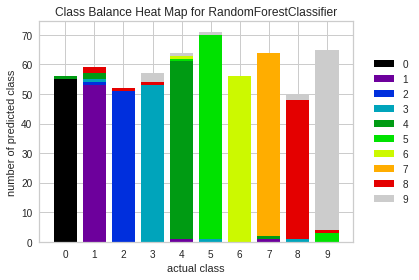

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = tts(digits.data, digits.target, test_size=0.33, random_state=42)
visualizer = ClassBalanceHeatMap(RandomForestClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof(outpath='heatmap.png')